#Deep Neural Network for Beginners-Group work report

##Day1: Exercise 1-3
###Exercise 1:Curve fitting
TASK: Curve Fitting of tide gauge data plotted below.  
5K samples were used for training data.  
Results of Exercise 1:  
Activation function used: relu
Number of neurons in the hidden layers: 35
Number of layers: 9
Epochs: 50

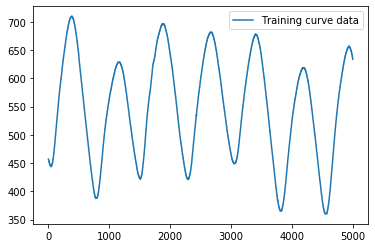

In [2]:
# %% TASK 1: Perform curve fitting with a deep neural network to fit the data 
# in better way than the baseline model. You have the following options:
# add more layers: model.add(Dense(units=xz, activation=xy))
# add more neurons xz
# use other activations, e.g., 'relu', 'sigmoid', 'elu'
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle

# %% load data and data set preparation (do not change)
# load tide gauge data [year month day hour minute height]
data = pandas.read_csv("pellworm_data.csv", header=None)
dataset = data.values
dataset = dataset.astype('float32')

# dataset size: number of data points x number of feature dimensions
D = dataset.shape[1]

# choose output data, choose only a subset (whole data set is too big)
N = 5000;
Y = dataset[0:N,D-1]

# choose input data: convert time data into index vector
dates = dataset[0:N,0:D-1]
X = numpy.array(range(0, N))
X = X.astype('float32')
# plot tide gauge data
plt.plot(X, Y)
plt.legend(['Training curve data'])
plt.show()

In [3]:
# scale data to range (0, 1)
X_min = X.min()
X = X - X_min
X_max = X.max()
X = X / X_max
Y_min = Y.min()
Y = Y - Y_min
Y_max = Y.max()
Y = Y / Y_max
# shuffle data for more stability during training
dates, X, Y = shuffle(dates, X, Y)

# %% baseline model 
model = Sequential()
#model.add(Dense(units=1, input_dim=1, activation='linear'))
for x in range(8):
    model.add(Dense(units=35, input_dim=1, activation='relu'))
model.add(Dense(units=1, input_dim=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# run baseline model
model.fit(X, Y, epochs=50,verbose=0)
pred = model.predict(X)

# rescale and plot result
X = (X * X_max) + X_min
Y = (Y * Y_max) + Y_min
pred = (pred * Y_max) + Y_min

Plot original and fitted data, by increasing the number of neurons and layers, the curve fitting gets better. Trainning with more complex model will take more time.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 35)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 35)                1260      
_________________________________________________________________
dense_3 (Dense)              (None, 35)                1260      
_________________________________________________________________
dense_4 (Dense)              (None, 35)                1260      
_________________________________________________________________
dense_5 (Dense)              (None, 35)                1260      
_________________________________________________________________
dense_6 (Dense)              (None, 35)                1260      
_________________________________________________________________
dense_7 (Dense)              (None, 35)               

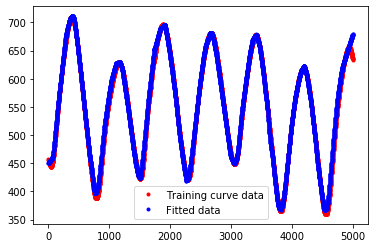

In [4]:
model.summary()
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
line1,=plt.plot(X, Y, 'r.', label="Training curve data") 
line2,=plt.plot(X, pred, 'b.', label="Fitted data") 
plt.legend(handles=[line1,line2])
plt.show()

###Excercise 2: Prediction
TASK: Use the regression network from Exercise 1 and use it for prediction
The scripts of loading libraries, model and data are hidden.

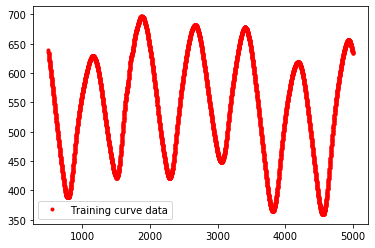

In [5]:
# %% TASK 2: Prediction of missing values in the curve
# Define a gap of missing data points in the curve and analyze which gap the 
# the model is able to 'fill'

import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle

# %% loading data (do not change)
# load tide gauge data [year month day hour minute height]
data = pandas.read_csv("pellworm_data.csv", header=None)
dataset = data.values
dataset = dataset.astype('float32')

# %% size of gap of missing data points in the curve and starting point
gap = 500
start = 0

# %% data set preparation (do not change)
# dataset size: number of data points x number of feature dimensions
D = dataset.shape[1]

# choose output data, choose only a subset (whole data set is too big)
N = 5000
Y1 = dataset[0:start,D-1]
Y2 = dataset[(start+gap):N,D-1]
Y = numpy.concatenate((Y1,Y2))
Ytest = dataset[start:(start+gap),D-1]

# choose input data: convert time data into index vector
R = numpy.array(range(0, N))
X1 = R[0:start]
X2 = R[(start+gap):N]
X = numpy.concatenate((X1,X2))
Xtest = R[start:(start+gap)]
X = X.astype('float32')
Xtest = Xtest.astype('float32')
# plot data
plt.plot(X, Y, 'r.')
plt.legend(['Training curve data'])
plt.show()

# scale data to range (-1, 1)
X_min = X.min()
X = X - X_min
X_max = X.max()
X = X / X_max
Xtest = (Xtest - X_min) / X_max
Y_min = Y.min()
Y = Y - Y_min
Y_max = Y.max()
Y = Y / Y_max
Ytest = (Ytest - Y_min) / Y_max


In [6]:
# shuffle data for more stability during training
X, Y = shuffle(X, Y)

model = Sequential()
#model.add(Dense(units=1, input_dim=1, activation='linear'))
for x in range(8):
    model.add(Dense(units=35, input_dim=1, activation='relu'))
model.add(Dense(units=1, input_dim=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# run baseline model
model.fit(X, Y, epochs=50,verbose=0)
pred = model.predict(X)
predtest = model.predict(Xtest) #ADD HERE THE PREDICTION CODE FOR THE TEST DATA

# %% rescale and plot result
X = (X * X_max) + X_min
Xtest = (Xtest * X_max) + X_min
Y = (Y * Y_max) + Y_min
Ytest = (Ytest * Y_max) + Y_min
pred = (pred * Y_max) + Y_min
predtest = (predtest * Y_max) + Y_min

Result: the prediction for the gap x:0~500 is not close to the real rest data. The time-steps regression network is not good at prediction.

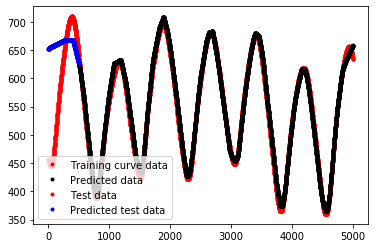

In [7]:
line1,=plt.plot(X, Y,'r.',label="Training curve data") 
line2,=plt.plot(X, pred,'k.',label="Predicted data") 
line3,=plt.plot(Xtest, Ytest,'r.',label="Test data") 
line4,=plt.plot(Xtest, predtest, 'b.',label="Predicted test data") 
plt.legend(handles=[line1,line2,line3,line4])
plt.show()

###Exercise 3 Classification: Prediction of diabetes based on diagnostic measurements.
Results of Exercise 3:  
Activation function used: linear+relu+sigmoid
Number of neurons in the hidden layers: 8;35;2
Number of layers: 7
Epochs: 120

In [21]:
# %% TASK 3: Perform classification on Pima Indians Diabetes Database using
# your knowledge from the previous task
# Decide on your own which network you want to use and choose suitable
# hyperparameter such as number of epochs
# Hint: the last layer should be a sigmoid layer
# Hint: the number of neurons in the last layer equals the number of classes

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# %% load data and data set preparation (do not change)
data = pd.read_csv('diabetes.csv')
data.head()

# split into train and test data
dataset = data.values 
X = dataset[0:600,0:8]  # features
C = dataset[0:600,8]    # classes (0 or 1)
C = to_categorical(C, num_classes=2)
Xtest = dataset[601:,0:8]
Ctest = dataset[601:,8]
Ctest = to_categorical(Ctest, num_classes=2) 

# scale data to range (0, 1)
X_min = X.min()
X = X - X_min
X_max = X.max()
X = X / X_max
Xtest = (Xtest - X_min) / X_max

In [22]:
epochsVal = 120 #ADD HERE THE NUMBER OF EPOCHS

#ADD HERE YOUR NEURAL NETWORK
# %% baseline model 
model = Sequential()
model.add(Dense(units=10, input_dim=8, activation='linear')) 
for x in range(5): #5
    model.add(Dense(units=35, activation='relu')) # 35 50
model.add(Dense(units=2, activation='sigmoid')) # LAST LAYER: with or without diabetes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model.fit(X, C, epochs=epochsVal, verbose=0)

scores = model.evaluate(Xtest, Ctest, verbose=0)

The Epoch value is raltively high as the Loss/Accuracy are not changing dramatically when Epoch > 80, more layers and neurons (10 RElu inner layers with 50 neuron) did not provide better accuracy after rerunning the training for multiple times.  
The Loss/Accuracy curves are fluctuating, which suggests using bigger sample size for training the model.  
The values of changes of the training loss (loss_function:categorical_crossentropy) and accuracy is not the same with the increase of Epoch.  
The model accuracy tested with the test data is around 75%. As the pathology of diatetes could be complex, better training data (e.g. increasing the percision of glucose and insulin measurement to improve data stratification) and more measurements(e.g. )


accuracy: 77.84%


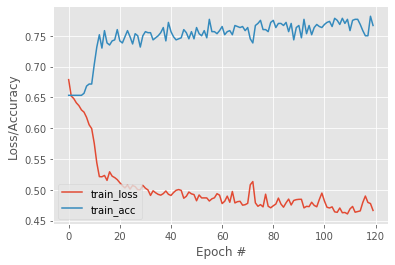

In [23]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# %% plotting the results ====================================================
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = epochsVal
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")